In [1]:
import psycopg2
from rdkit import Chem
from rdkit.Chem import Draw

In [2]:
# I connect to a database server (removing details) with the rdkit cartridge installed.
conn = psycopg2.connect(database="my_rdkit_db", 
user = "", 
password = "", host = "", port = "5432")
print("Opened database successfully")

Opened database successfully


I want a query CTAB that matches aromatic boronic acid/ester.

An example molecule we would like to match with our query CTAB

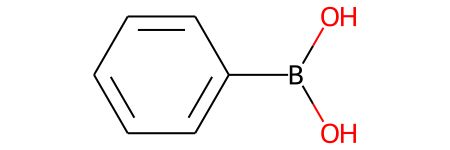

In [3]:
sm1 = 'OB(O)c1ccccc1'
Chem.MolFromSmiles(sm1)

ctab_og is the query ctab that should match sm1 and any other aromatic boronic acid/ester. 

ctab_fixed switches the aromatic bond '4' to a double bond type '2'. This is valid.

An equivalent alternative SMARTS query to the original ctab_og (which is not valid).

In [4]:
ctab_og = """Boronate acid/ester(aryl)
  SciTegic12012112112D

  5  4  0  0  0  0            999 V2000
    1.7243   -2.7324    0.0000 A   0  0
    2.7559   -2.1456    0.0000 C   0  0
    3.7808   -2.7324    0.0000 B   0  0
    4.8057   -2.1456    0.0000 O   0  0
    3.7808   -3.9190    0.0000 O   0  0
  1  2  4  0  0  1  0
  2  3  1  0
  3  4  1  0
  3  5  1  0
M  END
> <Name>
Boronate acid/ester(aryl)

"""
ctab_fixed = """Boronate acid/ester(aryl)
  SciTegic12012112112D

  5  4  0  0  0  0            999 V2000
    1.7243   -2.7324    0.0000 A   0  0
    2.7559   -2.1456    0.0000 C   0  0
    3.7808   -2.7324    0.0000 B   0  0
    4.8057   -2.1456    0.0000 O   0  0
    3.7808   -3.9190    0.0000 O   0  0
  1  2  2  0  0  1  0
  2  3  1  0
  3  4  1  0
  3  5  1  0
M  END
> <Name>
Boronate acid/ester(aryl)

"""
alt_smarts = '[!#1]:&@[#6]-[#5](-[#8])-[#8]'

This is the error using MolFromMolBlock (I don't think can see error from SQL)

In [8]:
Chem.MolFromMolBlock(ctab_og)
# Chem.MolFromMolBlock(ctab_fixed)

RDKit ERROR: [16:12:31] non-ring atom 0 marked aromatic
[16:12:31] non-ring atom 0 marked aromatic


In [5]:
cur = conn.cursor()
cur.execute(f"""select is_valid_ctab('{ctab_og}')""")
rows = cur.fetchall()
print(rows)
cur = conn.cursor()
cur.execute(f"""select is_valid_ctab('{ctab_fixed}')""")
rows = cur.fetchall()
print(rows)

[(False,)]
[(True,)]


In [6]:
cur = conn.cursor()
cur.execute(f"""select * from qmol_from_ctab('{ctab_og}')""")
rows = cur.fetchall()
print(rows)
cur = conn.cursor()
cur.execute(f"""select * from qmol_from_ctab('{ctab_fixed}')""")
rows = cur.fetchall()
print(rows)

[(None,)]
[('[!#1]=&@[#6]-[#5](-[#8])-[#8]',)]


In [7]:
cur = conn.cursor()
cur.execute(f"""select mol_from_smiles('{sm1}') @> qmol_from_ctab('{ctab_fixed}')""")
rows = cur.fetchall()
print(rows)
print('SMARTS')
cur = conn.cursor()
cur.execute(f"""select mol_from_smiles('{sm1}') @> qmol_from_smarts('{alt_smarts}')""")
rows = cur.fetchall()
print(rows)

[(False,)]
SMARTS
[(True,)]
